<a href="https://colab.research.google.com/github/Alice049/ml/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [13]:
#from sklearn.datasets import load_boston
#boston=load_boston()
print(type(raw_df))

<class 'pandas.core.frame.DataFrame'>


In [26]:
print(raw_df.keys())

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')


In [27]:
print(data.shape)

(506, 13)


In [28]:
print(target.shape)

(506,)


In [32]:
import pandas as pd
data=pd.DataFrame(data)
#data.columns=raw_df.feature_names

In [33]:
print(data.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [35]:
data['PRICE']=target

In [36]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  PRICE   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [37]:
print(data.describe(include='all'))

                0           1           2           3           4           5  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

                6           7           8           9          10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [39]:
pip install sklearn.metrics

ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [41]:
X,y=data.iloc[:,:-1],data.iloc[:,-1]
data_dmatrix=xgb.DMatrix(data=X,label=y)
print(type(data_dmatrix))

<class 'xgboost.core.DMatrix'>


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10)

In [45]:
xg_reg.fit(X_train,y_train)
preds=xg_reg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,preds))
print("RMSE 為 %f" % (rmse))

RMSE 為 6.322786


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:31:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [47]:
params={"objective":"reg:linear","colsample_bytree":0.3,'learning_rate':0.1,'max_depth':5,'alpha':10,'silent':1}
cv_results=xgb.cv(dtrain=data_dmatrix,params=params,nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse",as_pandas=True,seed=123,verbose_eval=False)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:38:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:38:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [48]:
print(cv_results.head(15))

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          8.685447        0.143925        8.802785       0.368790
1          8.370897        0.137485        8.588834       0.359794
2          8.002421        0.137444        8.339613       0.351332
3          7.701266        0.133364        8.170943       0.350495
4          7.478176        0.107332        8.030090       0.353947
5          7.175657        0.093751        7.812560       0.331910
6          6.935258        0.072123        7.685420       0.330248
7          6.641587        0.043671        7.457587       0.303716
8          6.199966        0.023593        7.097048       0.264294
9          5.757222        0.021798        6.698609       0.243431
10         5.563904        0.011942        6.593038       0.224966
11         5.241528        0.008911        6.328298       0.192267
12         4.934877        0.013195        6.069646       0.184858
13         4.815404        0.021694        5.997940       0.16

In [49]:
print(cv_results.tail())

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
45         2.273309        0.077849        4.330165       0.085088
46         2.231857        0.078118        4.296996       0.093924
47         2.214648        0.078751        4.287606       0.094350
48         2.197401        0.076991        4.276658       0.090479
49         2.166816        0.077762        4.250607       0.097290


In [50]:
print(cv_results["test-rmse-mean"].tail(1))

49    4.250607
Name: test-rmse-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:45:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:45:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


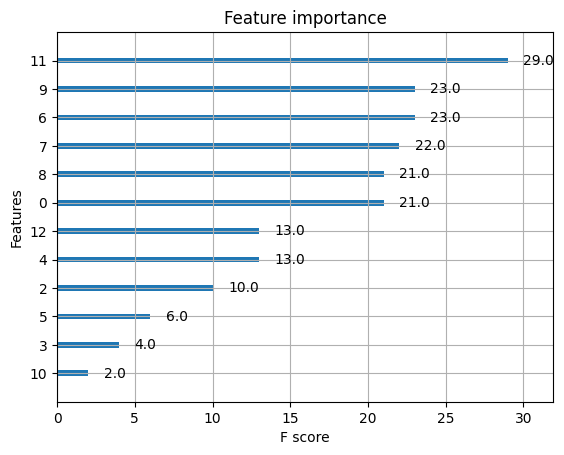

In [53]:
xg_reg= xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt
ax=xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize']=[5,5]
fig=ax.get_figure()